# Life Insurance Prediction using Random forest regression

In [69]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [70]:
dataset=pd.read_csv('insurance.csv')


In [71]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [72]:
dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<ipython-input-73-92f21c88261a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['age'])


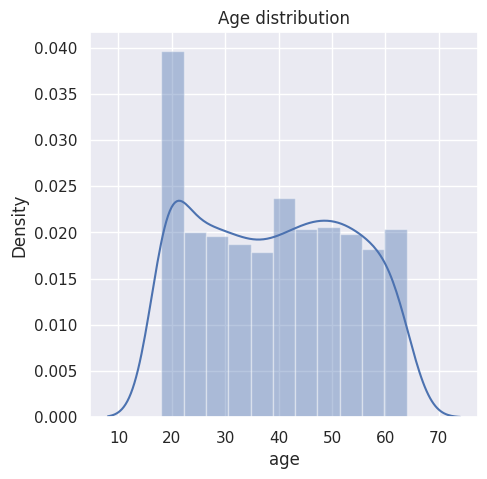

In [73]:
#Age distribution
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(dataset['age'])
plt.title('Age distribution')
plt.show()

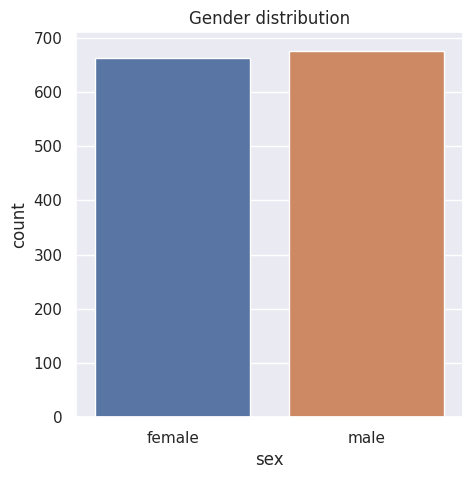

In [74]:
#Gender distribution
plt.figure(figsize=(5,5))
sns.countplot(x='sex',data=dataset)
plt.title('Gender distribution')
plt.show()

<ipython-input-75-2ac1dd8a4d26>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['bmi'])


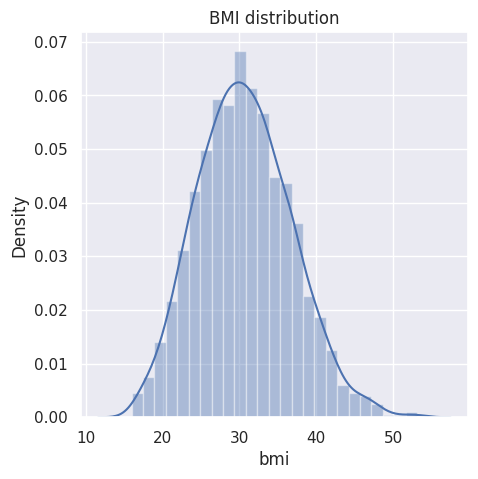

In [75]:
#Bmi distribution
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(dataset['bmi'])
plt.title('BMI distribution')
plt.show()

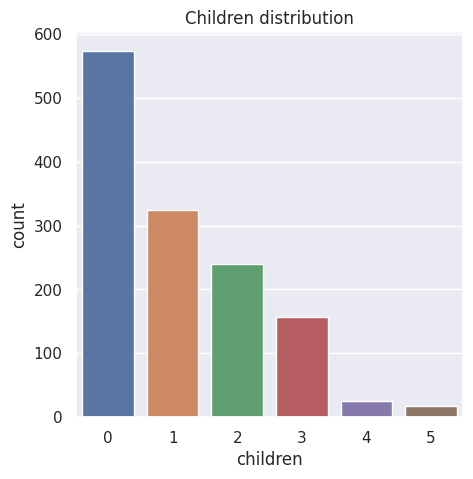

In [76]:
#Children distribution
plt.figure(figsize=(5,5))
sns.countplot(x='children',data=dataset)
plt.title('Children distribution')
plt.show()

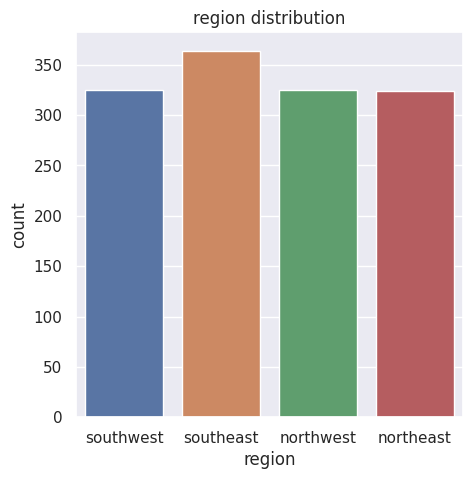

In [77]:
#region distribution
sns.set()
plt.figure(figsize=(5,5))
sns.countplot(x='region',data=dataset)
plt.title('region distribution')
plt.show()

<ipython-input-78-382d11ffdb7f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['charges'])


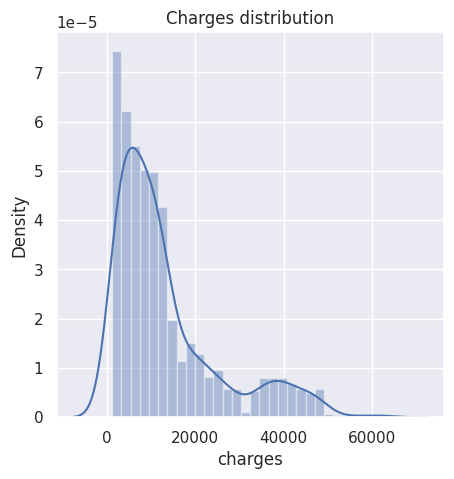

In [78]:
#Charge distribution
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(dataset['charges'])
plt.title('Charges distribution')
plt.show()

In [79]:
dataset.replace({'sex':{'male':1,'female':0},'smoker':{'yes':1,'no':0},'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}},inplace=True)

In [80]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [81]:
dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,1,30.97,3,0,2,10600.5483
1334,18,0,31.92,0,0,3,2205.9808
1335,18,0,36.85,0,0,0,1629.8335
1336,21,0,25.80,0,0,1,2007.9450
1337,61,0,29.07,0,1,2,29141.3603


In [82]:
dataset.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.455157,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.130197,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [83]:
dataset.shape

(1338, 7)

In [84]:
#segregating features and dependent variable
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [85]:
print(x)

[[19.    0.   27.9   0.    1.    1.  ]
 [18.    1.   33.77  1.    0.    0.  ]
 [28.    1.   33.    3.    0.    0.  ]
 ...
 [18.    0.   36.85  0.    0.    0.  ]
 [21.    0.   25.8   0.    0.    1.  ]
 [61.    0.   29.07  0.    1.    2.  ]]


In [86]:
print(y)

[16884.92  1725.55  4449.46 ...  1629.83  2007.94 29141.36]


In [87]:
  #Splitting training Dataset and test Dataset
  from sklearn.model_selection import train_test_split
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [88]:
#training the model and predicting the test values
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)

In [89]:
#Comparing Predicted values vs Actual values
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[11248.58  9724.53]
 [10027.67  8547.69]
 [44508.83 45702.02]
 [13243.64 12950.07]
 [ 9806.11  9644.25]
 [11343.79  4500.34]
 [ 2174.02  2198.19]
 [12450.99 11436.74]
 [ 7342.86  7537.16]
 [ 5885.29  5425.02]
 [ 7024.73  6753.04]
 [19093.74 10493.95]
 [ 7949.87  7337.75]
 [ 6015.58  4185.1 ]
 [22073.2  18310.74]
 [11489.27 10702.64]
 [13472.84 12523.6 ]
 [ 7904.68  3490.55]
 [ 6561.77  6457.84]
 [33877.01 33475.82]
 [23924.55 23967.38]
 [13462.84 12643.38]
 [10762.72 23045.57]
 [28256.45 23065.42]
 [ 4034.46  1674.63]
 [ 9625.12  4667.61]
 [ 7426.89  3732.63]
 [ 8138.83  7682.67]
 [ 3889.28  3756.62]
 [12361.36  8413.46]
 [ 7518.88  8059.68]
 [48214.29 48970.25]
 [14878.81 12979.36]
 [10889.16 20630.28]
 [15657.14 14571.89]
 [ 4049.95  4137.52]
 [ 9071.    8347.16]
 [37906.6  51194.56]
 [39437.67 40003.33]
 [ 3595.58  1880.49]
 [ 9559.13  5458.05]
 [ 3136.73  2867.12]
 [20869.58 20149.32]
 [47266.73 47496.49]
 [36631.56 36149.48]
 [ 4432.4  26018.95]
 [12477.81 19749.38]
 [ 6756.68  6

In [90]:
#evaluating the model using r2 test
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.875293600418708
